In [1]:
from astropy.time import Time, TimeDelta
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
import h5py
import numpy as np
import os
import glob
import pandas as pd
import scipy.stats as st
import sunpy.coordinates.sun as sn
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit
from palettable.colorbrewer.qualitative import Dark2_5, Set1_3

import huxt as H
import huxt_analysis as HA
import huxt_inputs as HIN
import GeoModelUncertainty as gmu

In [2]:
project_dirs = gmu.get_project_dirs()
data_avg = pd.read_csv(project_dirs['ELEvoHI_average'], delim_whitespace=True)
data_fst = pd.read_csv(project_dirs['ELEvoHI_fast'], delim_whitespace=True)
data_ext = pd.read_csv(project_dirs['ELEvoHI_extreme'], delim_whitespace=True)

In [11]:
print(data_avg['me_t'].mean(), data_fst['me_t'].mean(), data_ext['me_t'].mean())

print(data_avg.loc[data_avg['sep']==300, 'me_t'].mean(), data_fst.loc[data_fst['sep']==300, 'me_t'].mean(), data_ext.loc[data_ext['sep']==300,'me_t'].mean())

print(sum(data_avg['sep']==300),sum(data_fst['sep']==300),sum(data_ext['sep']==300))


-7.1313820341954015 -8.380283584548106 -8.11607768700361
-8.234358214285715 -8.325141742424243 -5.783791069767442
98 66 43


In [18]:
np.average([-8.2, -8.3, -5.7], weights=[98, 66, 43])

-7.71256038647343

In [16]:
for data in [data_avg, data_fst, data_ext]:
    u, c = np.unique(data['sep'], return_counts=True)
    print(u, c)

[270 280 290 300 310 320 330 340 350] [ 97 100  96  98  99  98  96  95  91]
[270 280 290 300 310 320 330 340 350] [62 65 62 66 76 78 90 94 93]
[270 280 290 300 310 320 330 340 350] [28 37 34 43 66 81 92 90 83]


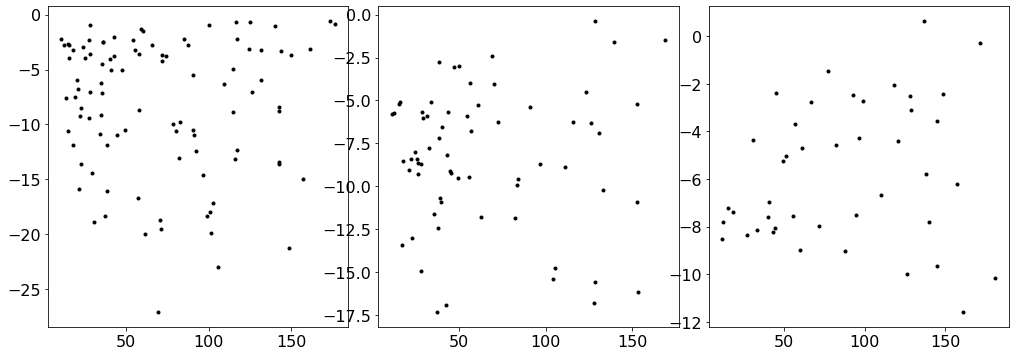

In [19]:
data_path = "C:/Users/yq904481/research/repos/GeoModelUncertainty/data/out_data/CME_scenarios_simulation_results.hdf5"
sim_data = h5py.File(data_path, 'r')

project_dirs = gmu.get_project_dirs()
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i, scenario in enumerate(['average', 'fast', 'extreme']):
    
    elevo_key = 'ELEvoHI_' + scenario
    elevo = pd.read_csv(project_dirs[elevo_key], delim_whitespace=True)
    
    elevo['v_boundary_std'] = 0
    
    for j, row in elevo.iterrows():
        
        sim_path = "/".join([scenario, row['run'], 'v_boundary_std'])
        elevo.loc[j, 'v_boundary_std'] = sim_data[sim_path][()]
        
    # Now plot error vs v_boundary var for L5.
    id_l5 = elevo['sep'] == 300
    
    ax[i].plot(elevo.loc[id_l5, 'v_boundary_std'], elevo.loc[id_l5, 'me_t'],'k.')
    
    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=0.99, wspace=0.1)
    
#for a in ax:
#    a.set_xlim(0, 170)
#    a.set_ylim(0, 30)
sim_data.close()        

In [21]:
x = np.ones((10,20))
print(x.shape)
print(np.diff(x, axis=0).shape)
print(np.diff(x, axis=1).shape)
print(np.diff(x, axis=-1).shape)

(10, 20)
(9, 20)
(10, 19)
(10, 19)
